# Hedge Fund Financial Report
Analyzed leverage and profitability ratios across industries to provide data-driven insights for hedge fund investment strategies.

## Dataset

You have two datasets:    

- `Balance_Sheet.xlsx`: Contains financial information related to assets, liabilities, and equity.  
- `Income_Statement.xlsx`: Contains revenue, expenses, and profitability metrics.

Both these datasets have three columns in common:   
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. 

    - `"tech"` for companies in the technology industry
    - `"fmcg"` for companies in the fast-moving consumer goods industry
    - `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

<br>

## Instructions
Compute the two ratios:

* A debt-to-equity ratio or an equity multiplier ratio.    
    Save this ratio in a column named `"leverage_ratio"` in a DataFrame called `df_ratios`.
* A gross margin ratio or an operating margin ratio.    
    Save this ratio in a column named `"profitability_ratio"`, in a DataFrame called `df_ratios`.

The datasets have information on the type of industry a company belongs to in a column called comp_type. Your manager also needs you to answer these three questions:

1. Which company type (comp_type) has the lowest profitability ratio?    
    Save this comp_type value as a string in a variable called lowest_profitability.

2. Which company type has the highest leverage ratio?    
    Save this comp_type value as a string in a variable called highest_leverage.

3. What is the relationship between leverage and profitability in the real estate companies represented in this data?    
    Is it "positive," "negative," or "no relationship?" Save one of these three strings in a variable called relationship.

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
# import openpyxl

# Read in the files
balance_sheet = pd.read_excel("../data_raw/Balance_Sheet.xlsx", index_col=0)
income_statement = pd.read_excel("../data_raw/Income_Statement.xlsx", index_col=0)

In [35]:
balance_sheet.head(10)

,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000
5,2020,tech,MSFT,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000
6,2021,tech,MSFT,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000
7,2022,tech,MSFT,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000
8,2018,tech,GOOG,4378000000,16701000000,1.107000e+09,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000
9,2019,tech,GOOG,5561000000,18498000000,9.990000e+08,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000


In [36]:
income_statement.head(10)

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000
5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000
6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000
7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000
8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000
9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000


In [37]:
# Merge both the dataframes and call it df_ratios
df_ratios = pd.merge(income_statement, balance_sheet, on = ["Year", "company", "comp_type"])
df_ratios.head(10)

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000
5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000
6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000
7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000
8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000,4378000000,16701000000,1.107000e+09,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000
9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000,5561000000,18498000000,9.990000e+08,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000


## Key Computations

You only need to compute one profitability ratio, but since there is a choice, compute both the gross margin ratio and the operating margin ratio 
- **Profitability Ratio**: Assesses a company's ability to generate profit from its revenue   
    - **Gross Margin Ratio** = (Total Revenue - Cost of Goods Sold) / Total Revenue
    - **Operating Margin Ratio** = Operating Income / Total Revenue


In [38]:
# Compute gross margin ratio
df_ratios["profitability_ratio"] = (df_ratios["Total Revenue"] - df_ratios["Cost Of Goods Sold"])/df_ratios["Total Revenue"]
df_ratios.head(10)

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,profitability_ratio
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0.378178
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,0.382332
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,0.417794
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.433096
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,0.659020
5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,0.677810
6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,0.689258
7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,0.684017
8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000,4378000000,16701000000,1.107000e+09,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000,0.564761
9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000,5561000000,18498000000,9.990000e+08,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000,0.555805


In [39]:
# Compute operating margin ratio, but commenting it out
df_ratios["profitability_ratio_2"] = (df_ratios["Total Revenue"] - df_ratios["Total Operating Expenses"])/df_ratios["Total Revenue"]
df_ratios.head(10)

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,profitability_ratio,profitability_ratio_2
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0.378178,0.245720
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,0.382332,0.241473
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,0.417794,0.297824
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.433096,0.302887
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,0.659020,0.341370
5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000,12530000000,13576000000,1.895000e+09,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,0.677810,0.370304
6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000,15163000000,14224000000,2.636000e+09,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,0.689258,0.415949
7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000,19000000000,13931000000,3.742000e+09,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,0.684017,0.420553
8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000,4378000000,16701000000,1.107000e+09,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000,0.564761,0.238234
9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000,5561000000,18498000000,9.990000e+08,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000,0.555805,0.221974


You only need to compute one leverage ratio, but we are providing the code to compute both the debt-to-equity ratio and the equity multiplier ratio 
- **Leverage Ratio**: Measures financial leverage using one of the following formulas
    - **Debt-to-Equity Ratio** = Total Liabilities / Total Stockholders' Equity
    - **Equity Multiplier Ratio** = Total Assets / Total Stockholders' Equity

In [40]:
# Compute debt-to-equity ratio
df_ratios["leverage_ratio"] = df_ratios["Total Liab"]/df_ratios["Total Stockholder Equity"]
df_ratios.head(10)

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Accounts Payable,Cash,...,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,profitability_ratio,profitability_ratio_2,leverage_ratio
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,46236000000,48844000000,...,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0.378178,0.245720,2.741004
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,42296000000,38016000000,...,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,0.382332,0.241473,3.957039
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,54763000000,34940000000,...,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,0.417794,0.297824,4.563512
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,64115000000,23646000000,...,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.433096,0.302887,5.961537
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,9382000000,11356000000,...,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,0.659020,0.341370,1.800313
5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000,12530000000,13576000000,...,52904000000,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,0.677810,0.370304,1.546921
6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000,15163000000,14224000000,...,70803000000,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,0.689258,0.415949,1.350755
7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000,19000000000,13931000000,...,87546000000,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,0.684017,0.420553,1.190679
8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000,4378000000,16701000000,...,59719000000,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000,0.564761,0.238234,0.310559
9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000,5561000000,18498000000,...,84587000000,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000,0.555805,0.221974,0.369670


In [41]:
# Compute equity multiplier ratio, but commenting it out
df_ratios["leverage_ratio_2"] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]
df_ratios.head(10)

,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,Accounts Payable,Cash,...,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,profitability_ratio,profitability_ratio_2,leverage_ratio,leverage_ratio_2
0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000,46236000000,48844000000,...,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0.378178,0.245720,2.741004,3.741004
1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000,42296000000,38016000000,...,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,0.382332,0.241473,3.957039,4.957039
2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000,54763000000,34940000000,...,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,0.417794,0.297824,4.563512,5.563512
3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000,64115000000,23646000000,...,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,0.433096,0.302887,5.961537,6.961537
4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000,9382000000,11356000000,...,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,0.659020,0.341370,1.800313,2.800313
5,2020,tech,MSFT,46078000000,96937000000,52959000000,90056000000,143015000000,12530000000,13576000000,...,1.229160e+11,301311000000,181915000000,72310000000,183007000000,118304000000,0.677810,0.370304,1.546921,2.546921
6,2021,tech,MSFT,52232000000,115856000000,69916000000,98172000000,168088000000,15163000000,14224000000,...,1.160320e+11,333779000000,184406000000,88657000000,191791000000,141988000000,0.689258,0.415949,1.350755,2.350755
7,2022,tech,MSFT,62650000000,135620000000,83383000000,114887000000,198270000000,19000000000,13931000000,...,9.081800e+10,364840000000,169684000000,95082000000,198298000000,166542000000,0.684017,0.420553,1.190679,2.190679
8,2018,tech,GOOG,59549000000,77270000000,32595000000,104224000000,136819000000,4378000000,16701000000,...,9.243900e+10,232792000000,135676000000,34620000000,55164000000,177628000000,0.564761,0.238234,0.310559,1.310559
9,2019,tech,GOOG,71896000000,89961000000,35928000000,125929000000,161857000000,5561000000,18498000000,...,1.011770e+11,275909000000,152578000000,45221000000,74467000000,201442000000,0.555805,0.221974,0.369670,1.369670


In [45]:
# Using pivot table to see the "comp_type" with the lowest average profitability ratio
print(df_ratios.pivot_table(index="comp_type", values="profitability_ratio"))

# Using pivot table to see the "comp_type" with the highest average leverage ratio
print(df_ratios.pivot_table(index="comp_type", values="leverage_ratio"))

           profitability_ratio
comp_type                     
fmcg                  0.514396
real_est              0.534848
tech                  0.572062
           leverage_ratio
comp_type                
fmcg             2.997896
real_est         5.692041
tech             1.777448


In [46]:
lowest_profitability = "fmcg"
highest_leverage = "real_est"

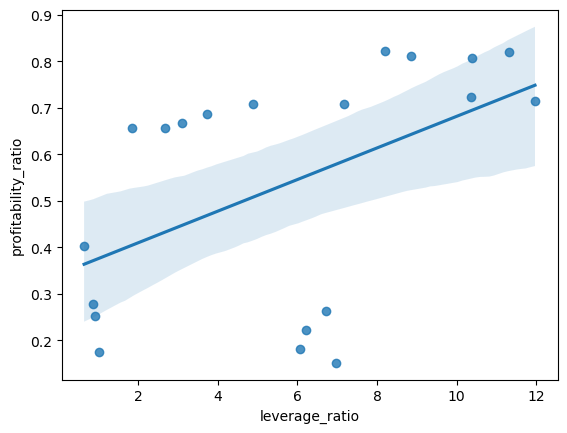

In [47]:
# Plot the leverage ratio on x-axis and profitability on y axis to see if real estate companies with higher leverage ratio have  higher profitability
df_real_est = df_ratios.loc[df_ratios["comp_type"]=="real_est"]
plot = sns.regplot(data=df_real_est, x="leverage_ratio", y="profitability_ratio")

In [ ]:
relationship = "positive"

In [48]:
# jupyter nbconvert --to html "Banking Investment Optimization Framework/notebooks/hedge-fund-financial-report.ipynb"